In [1]:
!pip install imutils


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
from matplotlib import pyplot as plt
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
	(1, 1, 1, 0, 1, 1, 1): 0,
	(0, 0, 1, 0, 0, 1, 0): 1,
	(1, 0, 1, 1, 1, 1, 0): 2,
	(1, 0, 1, 1, 0, 1, 1): 3,
	(0, 1, 1, 1, 0, 1, 0): 4,
	(1, 1, 0, 1, 0, 1, 1): 5,
	(1, 1, 0, 1, 1, 1, 1): 6,
	(1, 0, 1, 0, 0, 1, 0): 7,
	(1, 1, 1, 1, 1, 1, 1): 8,
	(1, 1, 1, 1, 0, 1, 1): 9
}

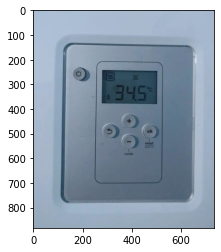

In [2]:
# load the example image
image = cv2.imread("example.jpg")
plt.imshow(image)

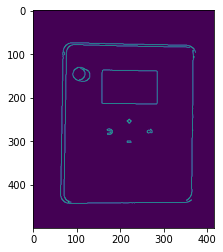

In [3]:
# pre-process the image by resizing it, 
# converting it to graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)
plt.imshow(edged)

In [4]:
# find contours in the edge map, then sort them by their
# size in descending order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# if the contour has four vertices, then we have found
	# the thermostat display
	if len(approx) == 4:
		displayCnt = approx
		break

In [5]:
displayCnt

array([[[159, 138]],

       [[158, 213]],

       [[284, 215]],

       [[285, 140]]], dtype=int32)

In [6]:
# extract the thermostat display, apply a perspective transform
# to it
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

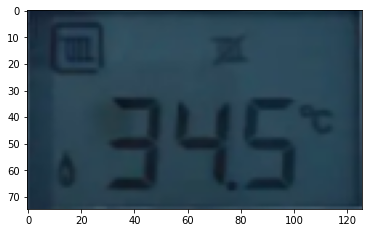

In [7]:
plt.imshow(output)

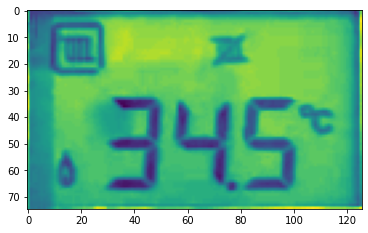

In [8]:
plt.imshow(warped)

In [9]:
# threshold the warped image, then apply a series of morphological
# operations to cleanup the thresholded image
thresh = cv2.threshold(warped, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

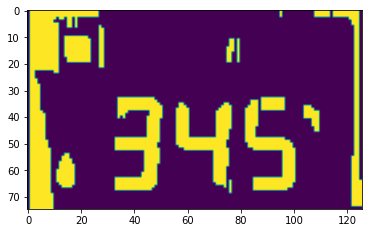

In [10]:
plt.imshow(thresh)

(56, 35) (77, 67)


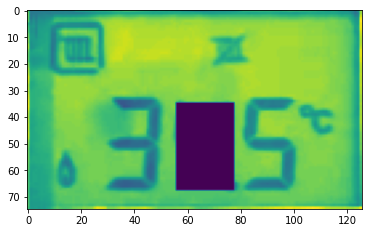

(82, 34) (101, 68)


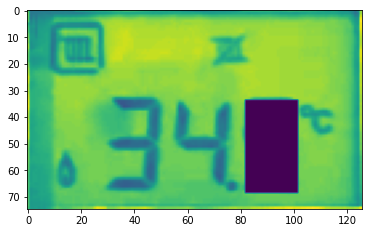

(33, 33) (51, 68)


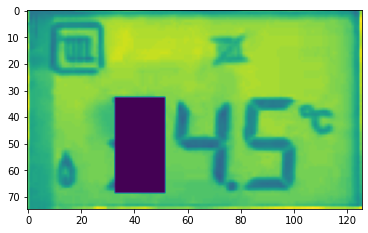

In [11]:
# find contours in the thresholded image, then initialize the
# digit contours lists
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []
# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)

#     if the contour is sufficiently large, it must be a digit
    if w >= 15 and (h >= 30 and h <= 40):
        start_point=(x, y)
        end_point=(x+w, y+h)
        print(start_point,end_point)
        color = (0, 0, 0)
        thickness = -1
        img1 = cv2.rectangle(warped.copy(), start_point, end_point, color, thickness)
        plt.imshow(img1)
        plt.show()
        digitCnts.append(c)

In [12]:
print(digitCnts)

[array([[[57, 35]],

       [[57, 36]],

       [[56, 37]],

       [[56, 50]],

       [[57, 51]],

       [[58, 51]],

       [[59, 52]],

       [[69, 52]],

       [[70, 53]],

       [[70, 64]],

       [[71, 65]],

       [[73, 65]],

       [[74, 66]],

       [[74, 59]],

       [[75, 58]],

       [[75, 52]],

       [[74, 51]],

       [[74, 49]],

       [[75, 48]],

       [[75, 45]],

       [[76, 44]],

       [[76, 36]],

       [[75, 35]],

       [[74, 35]],

       [[71, 38]],

       [[71, 47]],

       [[70, 48]],

       [[61, 48]],

       [[60, 47]],

       [[60, 37]],

       [[58, 35]]], dtype=int32), array([[[ 84,  34]],

       [[ 84,  35]],

       [[ 82,  37]],

       [[ 82,  49]],

       [[ 83,  50]],

       [[ 83,  51]],

       [[ 84,  51]],

       [[ 85,  52]],

       [[ 95,  52]],

       [[ 96,  53]],

       [[ 96,  62]],

       [[ 95,  63]],

       [[ 85,  63]],

       [[ 85,  67]],

       [[ 97,  67]],

       [[ 98,  66]],

       [[ 99,

In [13]:
# sort the contours from left-to-right, then initialize the
# actual digits themselves
digitCnts = contours.sort_contours(digitCnts,
	method="left-to-right")[0]
digits = []

In [13]:
len(digitCnts)

3

In [14]:
print(digitCnts)

(array([[[34, 33]],

       [[34, 40]],

       [[35, 39]],

       [[36, 40]],

       [[36, 39]],

       [[38, 37]],

       [[45, 37]],

       [[46, 38]],

       [[46, 39]],

       [[45, 40]],

       [[45, 47]],

       [[44, 48]],

       [[33, 48]],

       [[33, 52]],

       [[43, 52]],

       [[44, 53]],

       [[44, 60]],

       [[43, 61]],

       [[43, 62]],

       [[42, 63]],

       [[33, 63]],

       [[33, 67]],

       [[46, 67]],

       [[48, 65]],

       [[48, 58]],

       [[49, 57]],

       [[49, 52]],

       [[48, 51]],

       [[48, 50]],

       [[49, 49]],

       [[49, 41]],

       [[50, 40]],

       [[50, 36]],

       [[47, 33]]], dtype=int32), array([[[57, 35]],

       [[57, 36]],

       [[56, 37]],

       [[56, 50]],

       [[57, 51]],

       [[58, 51]],

       [[59, 52]],

       [[69, 52]],

       [[70, 53]],

       [[70, 64]],

       [[71, 65]],

       [[73, 65]],

       [[74, 66]],

       [[74, 59]],

       [[75, 58]],

     

In [15]:
# loop over each of the digits
for c in digitCnts:
	# extract the digit ROI
	(x, y, w, h) = cv2.boundingRect(c)
	roi = thresh[y:y + h, x:x + w]
	# compute the width and height of each of the 7 segments
	# we are going to examine
	(roiH, roiW) = roi.shape
	(dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
	dHC = int(roiH * 0.05)
	# define the set of 7 segments
	segments = [
		((0, 0), (w, dH)),	# top
		((0, 0), (dW, h // 2)),	# top-left
		((w - dW, 0), (w, h // 2)),	# top-right
		((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
		((0, h // 2), (dW, h)),	# bottom-left
		((w - dW, h // 2), (w, h)),	# bottom-right
		((0, h - dH), (w, h))	# bottom
	]
	on = [0] * len(segments)
	# loop over the segments
	for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
		# extract the segment ROI, count the total number of
		# thresholded pixels in the segment, and then compute
		# the area of the segment
		segROI = roi[yA:yB, xA:xB]
		total = cv2.countNonZero(segROI)
		area = (xB - xA) * (yB - yA)
		# if the total number of non-zero pixels is greater than
		# 50% of the area, mark the segment as "on"
		if total / float(area) > 0.5:
			on[i]= 1
	# lookup the digit and draw it on the image
	digit = DIGITS_LOOKUP[tuple(on)]
	digits.append(digit)
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
	cv2.putText(output, str(digit), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
	print(digit)

3
4
5


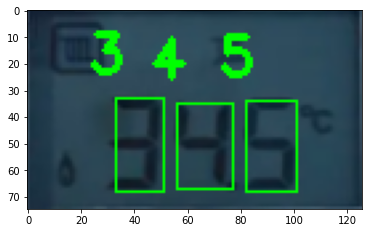

In [16]:
plt.imshow(output)

In [17]:
# display the digits
print(digits)
print(u"{}{}.{} \u00b0C".format(*digits))
# cv2.imshow("Input", image)
# cv2.imshow("Output", output)
# cv2.waitKey(0)

[3, 4, 5]
34.5 °C
